In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pf

In [2]:
# loading in the data
churn_data = pd.read_csv("dataset/cell2celltrain.csv", index_col = 0, skipinitialspace=True)
churn_data.columns.tolist()

C:\Users\ajayi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['Churn',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'ServiceArea',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'OwnsMotorcycle',
 'AdjustmentsToCreditRating',
 'Handset

In [3]:
use = ['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'DroppedCalls', 'HandsetPrice', "UnansweredCalls", 'CustomerCareCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'MonthsInService', 'ActiveSubs', 'Handsets', 'CurrentEquipmentDays', 'CreditRating', 'BuysViaMailOrder', 'RespondsToMailOffers', 'PeakCallsInOut', 'OffPeakCallsInOut', 'TotalRecurringCharge', 'UniqueSubs', 'OverageMinutes', 'Occupation', 'MaritalStatus']
churn_data = churn_data[use]
print(churn_data.info())
print(len(churn_data.columns))

target_col = ["Churn"]
cat_cols = churn_data.nunique()[churn_data.nunique() < 20].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
for i in cat_cols:
    print(churn_data[i].unique())

#print("Categorical Columns...")
#print(cat_cols)
    
num_cols   = [x for x in churn_data.columns if x not in cat_cols + target_col]
#print("Numerical Feature...")
#print(num_cols)
#churn_data = churn_data.drop(axis = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71047 entries, 3000002 to 3399986
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 51047 non-null  object 
 1   MonthlyRevenue        70831 non-null  float64
 2   MonthlyMinutes        70831 non-null  float64
 3   DroppedCalls          71047 non-null  float64
 4   HandsetPrice          71047 non-null  object 
 5   UnansweredCalls       71047 non-null  float64
 6   CustomerCareCalls     71047 non-null  float64
 7   ReceivedCalls         71047 non-null  float64
 8   OutboundCalls         71047 non-null  float64
 9   InboundCalls          71047 non-null  float64
 10  MonthsInService       71047 non-null  int64  
 11  ActiveSubs            71047 non-null  int64  
 12  Handsets              71046 non-null  float64
 13  CurrentEquipmentDays  71046 non-null  float64
 14  CreditRating          71047 non-null  object 
 15  BuysViaMail

In [4]:
churn_data.nunique().to_frame().transpose()

Churn  MonthlyRevenue  MonthlyMinutes  DroppedCalls  HandsetPrice  \
0      2           14266            2898           304            16   

   UnansweredCalls  CustomerCareCalls  ReceivedCalls  OutboundCalls  \
0              916                198           6772            841   

   InboundCalls  ...  CreditRating  BuysViaMailOrder  RespondsToMailOffers  \
0           500  ...             7                 2                     2   

   PeakCallsInOut  OffPeakCallsInOut  TotalRecurringCharge  UniqueSubs  \
0            2002               1817                   223          15   

   OverageMinutes  Occupation  MaritalStatus  
0             823           8              3  

[1 rows x 24 columns]

In [5]:
churn_data['MadeCallToRetentionTeam'].value_counts()

KeyError: 'MadeCallToRetentionTeam'

churn_data.columns.tolist()
cols = ["Churn", "MaritalStatus", "ChildrenInHH", "Occupation", "CreditRating", 'OwnsMotorcycle', 'NewCellphoneUser', 'NotNewCellphoneUser', 'TruckOwner', 'HandsetWebCapable', 'MadeCallToRetentionTeam', 'TotalRecurringCharge', 'MonthlyRevenue']
churn_data = churn_data[cols]

Churn                   20000
MonthlyRevenue            216
MonthlyMinutes            216
DroppedCalls                0
HandsetPrice                0
UnansweredCalls             0
CustomerCareCalls           0
ReceivedCalls               0
OutboundCalls               0
InboundCalls                0
MonthsInService             0
ActiveSubs                  0
Handsets                    1
CurrentEquipmentDays        1
CreditRating                0
BuysViaMailOrder            0
RespondsToMailOffers        0
PeakCallsInOut              0
OffPeakCallsInOut           0
TotalRecurringCharge      216
UniqueSubs                  0
OverageMinutes            216
Occupation                  0
MaritalStatus               0
dtype: int64


Text(0.5, 1.0, 'Missing Data Plot')

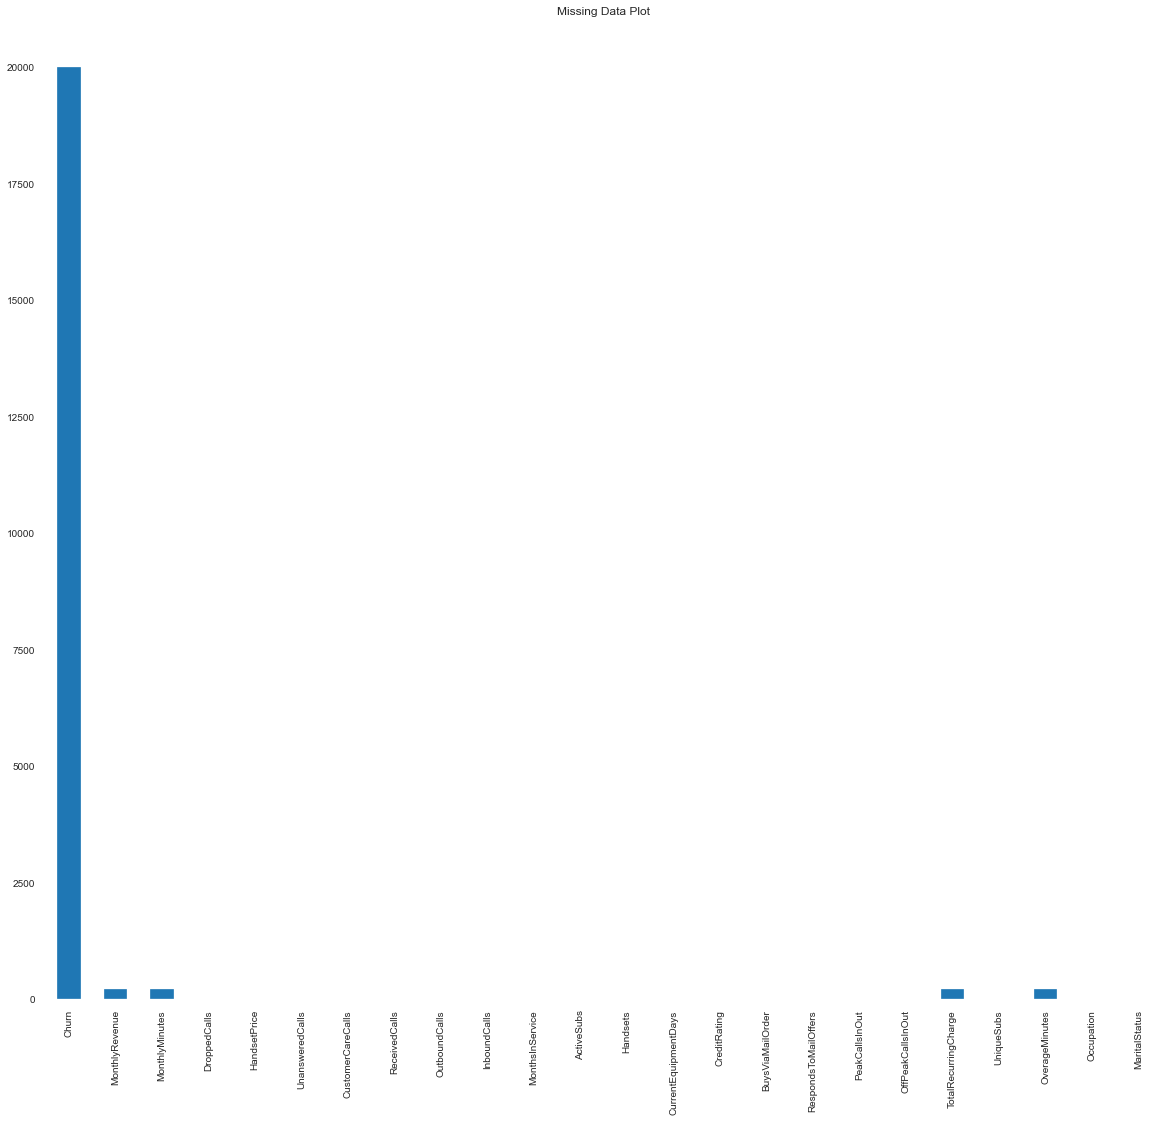

In [10]:
plt.figure(figsize = (20, 18))
churn_data.isna().sum().plot(kind = "bar")
print(churn_data.isna().sum())
plt.title("Missing Data Plot")

In [11]:
churn_data.dropna(axis = 0, inplace = True)

In [12]:
def seperate(df):
    categorical, numerical = list(), list()
    for col, col_type in df.dtypes.iteritems():
        
        if col_type == 'O':
            categorical.append(col)
        else:
            numerical.append(col)
    return categorical, numerical

cat_cols, num_cols = seperate(churn_data.drop(["Churn"], axis = 1))
print(cat_cols)

['HandsetPrice', 'CreditRating', 'BuysViaMailOrder', 'RespondsToMailOffers', 'Occupation', 'MaritalStatus']


In [13]:
print(num_cols)

['MonthlyRevenue', 'MonthlyMinutes', 'DroppedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'MonthsInService', 'ActiveSubs', 'Handsets', 'CurrentEquipmentDays', 'PeakCallsInOut', 'OffPeakCallsInOut', 'TotalRecurringCharge', 'UniqueSubs', 'OverageMinutes']


In [14]:
#sns.pairplot(churn_data)

In [15]:
# Customer attrition in the data

import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode()#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import os


lab = churn_data["Churn"].value_counts().keys().tolist()
val = churn_data["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'crimson' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

# Variable Distribution in customer Attrition

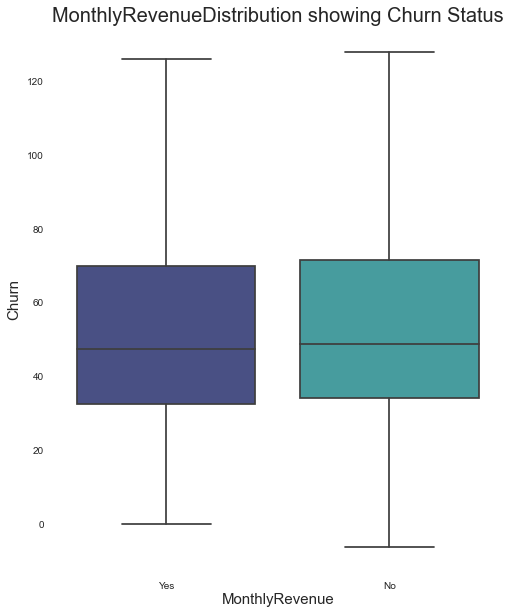

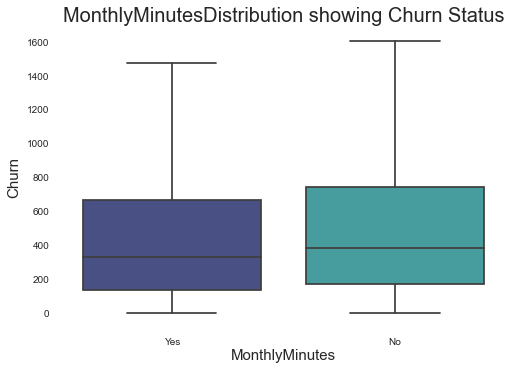

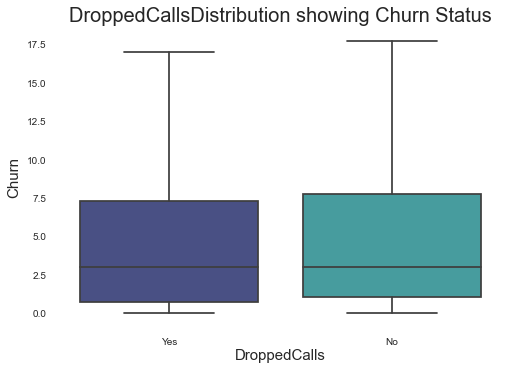

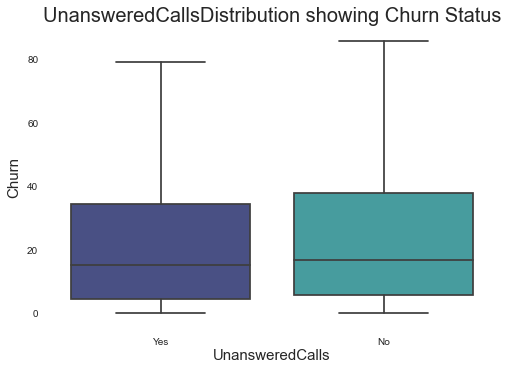

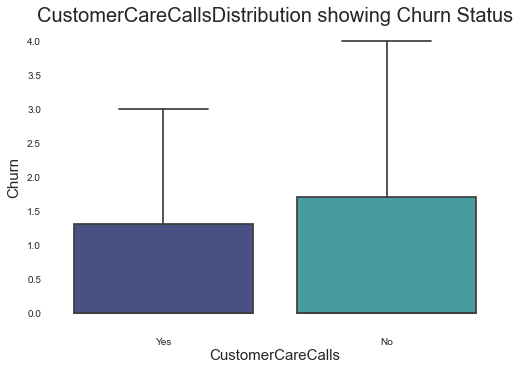

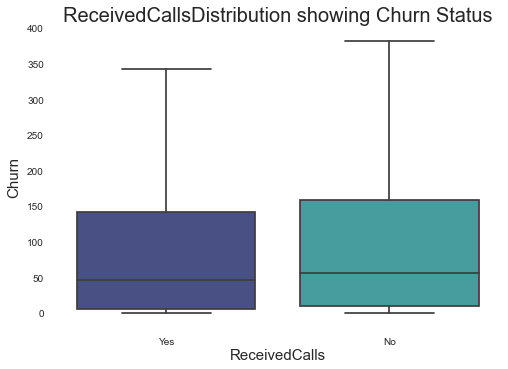

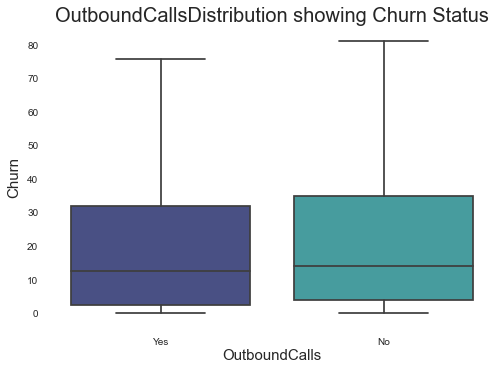

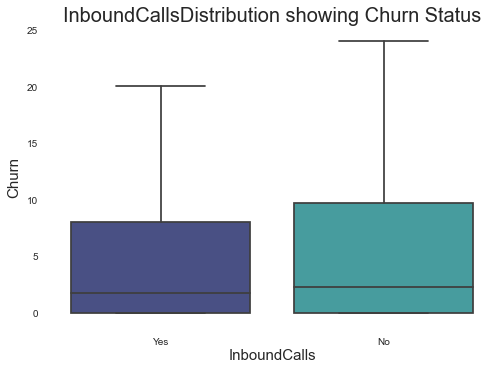

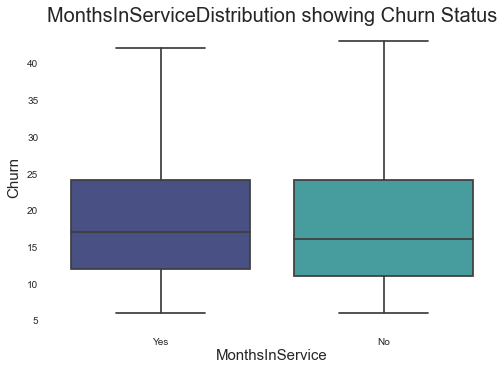

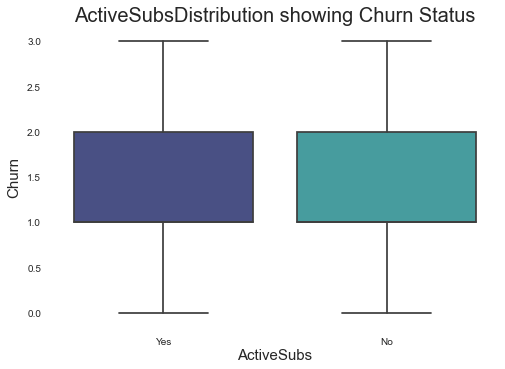

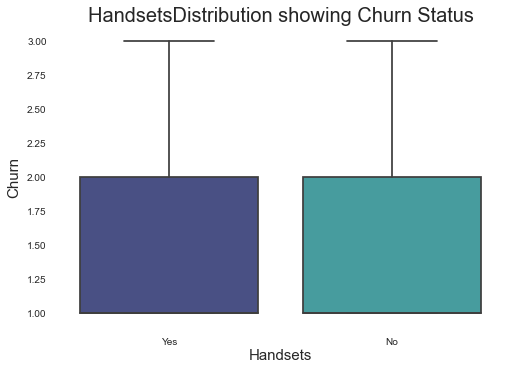

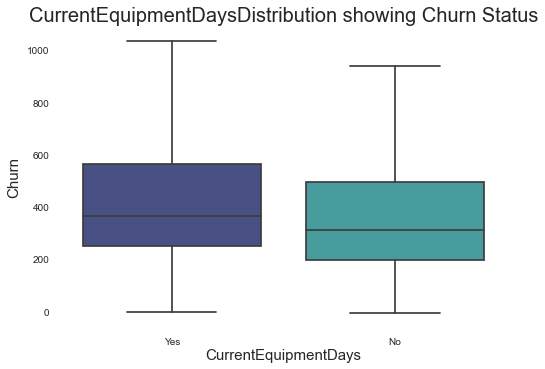

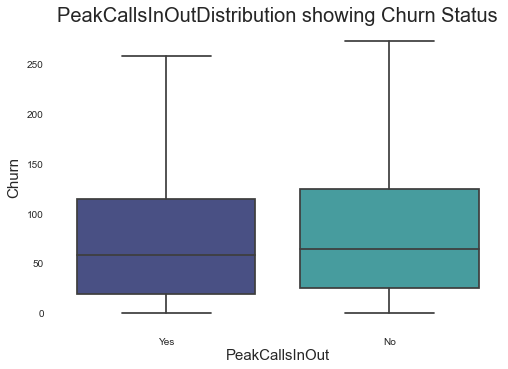

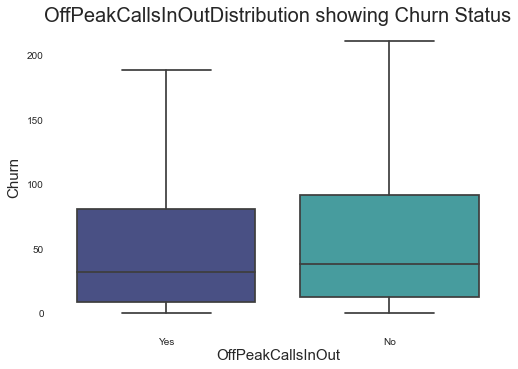

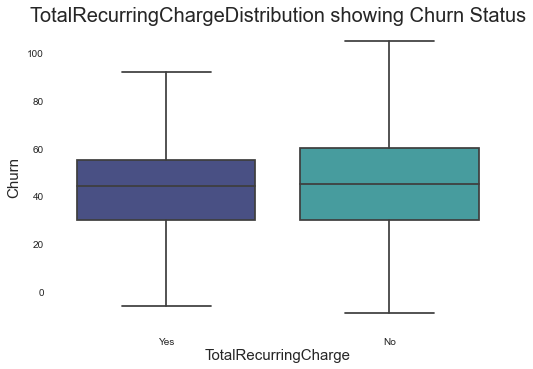

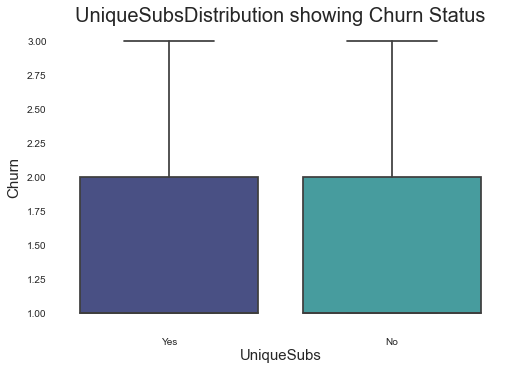

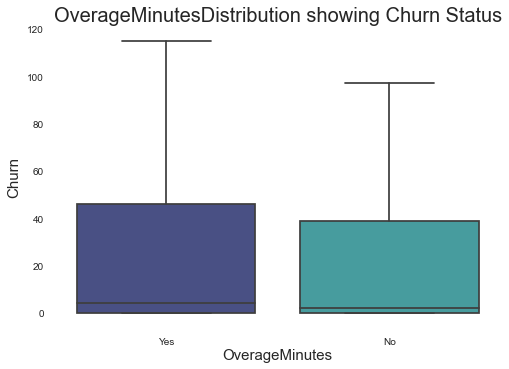

In [16]:
plt.figure(figsize=(8,10))

for k, i in enumerate(num_cols):
    sns.boxplot(x='Churn', y = i ,data=churn_data, palette='mako',showfliers=False)

    plt.xlabel(i, fontsize=15, labelpad=2)
    plt.ylabel('Churn', fontsize=15, labelpad=6)
    plt.title(i + 'Distribution showing Churn Status', fontsize=20, pad=6);
    plt.show()

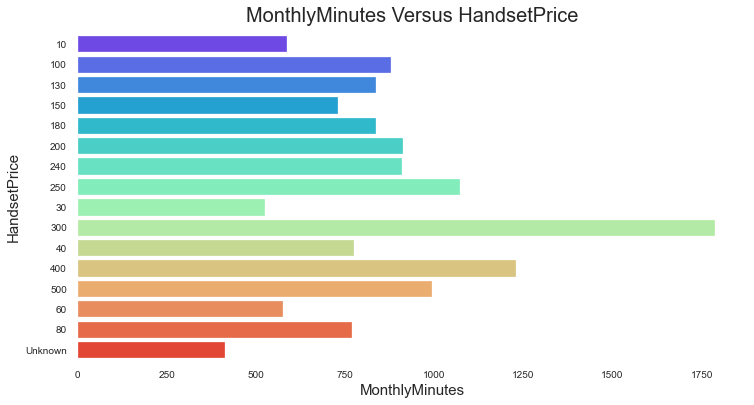

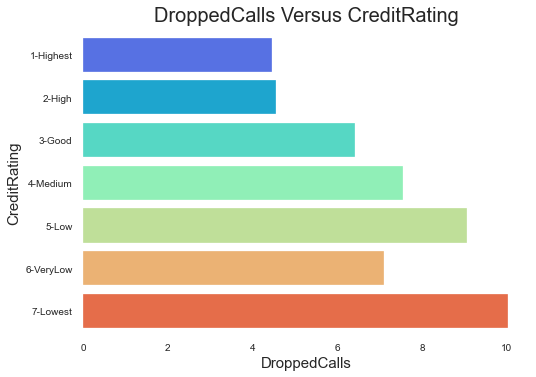

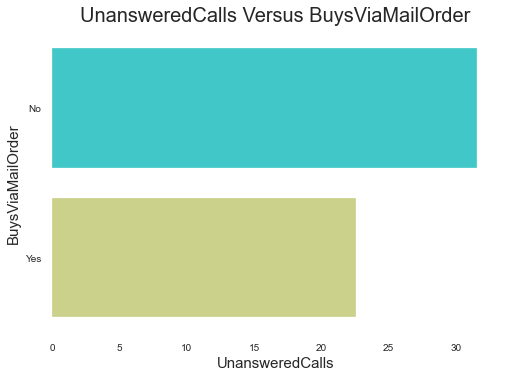

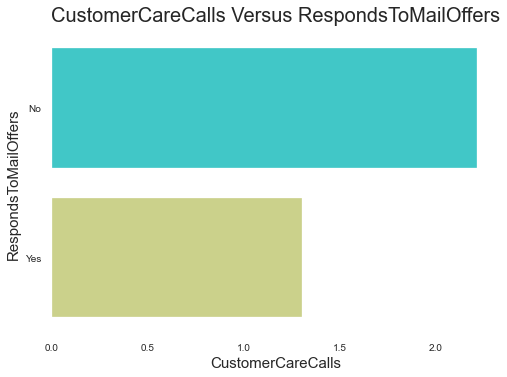

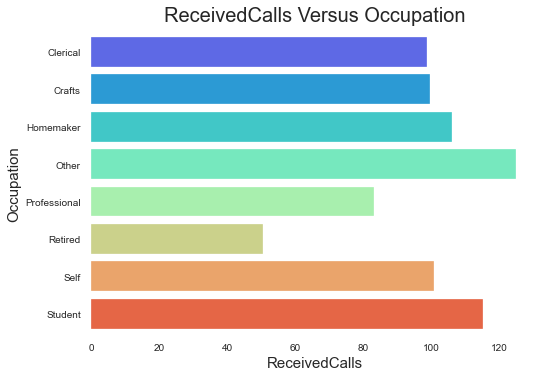

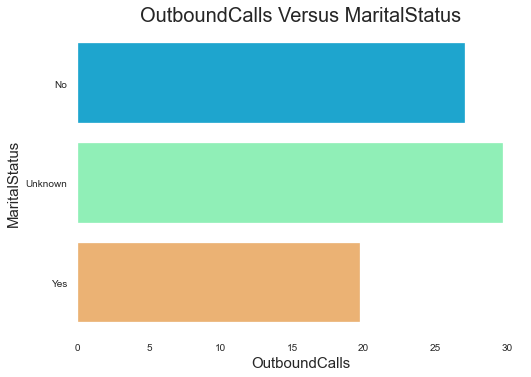

In [17]:
# On an average, interest rates are highest for clients seeking loans for medical reasons, 
# followed by business and other reasons
plt.figure(figsize=(12,6))
for i in range(len(cat_cols)):
    
    
    data = churn_data.groupby(cat_cols[i])[num_cols[i+1]].mean()

    sns.barplot(x=data.values, y=data.index, palette='rainbow')

    plt.xlabel(num_cols[i+1], fontsize=15)
    plt.ylabel(cat_cols[i], fontsize=15)
    plt.title(num_cols[i+1] + ' ' + 'Versus' + ' ' + cat_cols[i], fontsize=20, pad=12);
    plt.show()

In [18]:
churn_data.describe().transpose()

count        mean         std    min     25%     50%  \
MonthlyRevenue        50890.0   58.834136   44.507700  -6.17   33.61   48.46   
MonthlyMinutes        50890.0  525.663745  529.871145   0.00  158.00  366.00   
DroppedCalls          50890.0    6.016823    9.044945   0.00    0.70    3.00   
UnansweredCalls       50890.0   28.320898   38.880197   0.00    5.30   16.30   
CustomerCareCalls     50890.0    1.873024    5.101084   0.00    0.00    0.00   
ReceivedCalls         50890.0  114.973712  166.527395   0.00    8.50   52.90   
OutboundCalls         50890.0   25.405199   35.173475   0.00    3.30   13.70   
InboundCalls          50890.0    8.190676   16.675901   0.00    0.00    2.00   
MonthsInService       50890.0   18.716310    9.769502   6.00   11.00   16.00   
ActiveSubs            50890.0    1.353861    0.675573   0.00    1.00    1.00   
Handsets              50890.0    1.804284    1.329860   1.00    1.00    1.00   
CurrentEquipmentDays  50890.0  379.832914  252.847765  -5.00  205.00  329.00   
PeakCallsInOut        50890.0   90.632537  104.809556   0.00   23.30   62.30   
OffPeakCallsInOut     50890.0   67.739703   92.743834   0.00   11.00   35.70   
TotalRecurringCharge  50890.0   46.829298   23.848440 -11.00   30.00   45.00   
UniqueSubs            50890.0    1.531755    1.224437   1.00    1.00    1.00   
OverageMinutes        50890.0   40.028571   96.588862   0.00    0.00    3.00   

                         75%      max  
MonthlyRevenue         71.06  1223.38  
MonthlyMinutes        723.00  7359.00  
DroppedCalls            7.70   221.70  
UnansweredCalls        36.70   848.70  
CustomerCareCalls       1.70   327.30  
ReceivedCalls         153.80  2692.40  
OutboundCalls          34.00   644.30  
InboundCalls            9.30   519.30  
MonthsInService        24.00    61.00  
ActiveSubs              2.00    53.00  
Handsets                2.00    24.00  
CurrentEquipmentDays  514.00  1812.00  
PeakCallsInOut        121.30  2090.70  
OffPeakCallsInOut      88.70  1474.70  
TotalRecurringCharge   60.00   400.00  
UniqueSubs              2.00   196.00  
OverageMinutes         41.00  4321.00

# Data Pre-Processing
2. Handle Missing Values
3. Drop columns
4. One-hot encode categorical columns


In [19]:
print(churn_data.isna().sum())

Churn                   0
MonthlyRevenue          0
MonthlyMinutes          0
DroppedCalls            0
HandsetPrice            0
UnansweredCalls         0
CustomerCareCalls       0
ReceivedCalls           0
OutboundCalls           0
InboundCalls            0
MonthsInService         0
ActiveSubs              0
Handsets                0
CurrentEquipmentDays    0
CreditRating            0
BuysViaMailOrder        0
RespondsToMailOffers    0
PeakCallsInOut          0
OffPeakCallsInOut       0
TotalRecurringCharge    0
UniqueSubs              0
OverageMinutes          0
Occupation              0
MaritalStatus           0
dtype: int64


### 2.1 Handle missing values in the `Monthly Revenue column`
- **`Fill Nans with Mean`**
- **Logic behind it**: missing values are filled in with **`mean of the column**; missing is being translated as **`unverified`**

In [20]:
churn_data['MonthlyMinutes'] = churn_data['MonthlyMinutes'].fillna(churn_data['MonthlyMinutes'].mean())
churn_data['MonthlyRevenue'] = churn_data['MonthlyRevenue'].fillna(churn_data['MonthlyRevenue'].mean())
#churn_data['DirectorAssistedCalls'] = churn_data['DirectorAssistedCalls'].fillna(churn_data['DirectorAssistedCalls'].mean())
churn_data['OverageMinutes'] = churn_data['OverageMinutes'].fillna(churn_data['OverageMinutes'].mean())
#churn_data['RoamingCalls'] = churn_data['RoamingCalls'].fillna(churn_data['RoamingCalls'].mean())
churn_data['PercChangeMinutes'] = churn_data['PercChangeMinutes'].fillna(churn_data['PercChangeMinutes'].mean())
churn_data['PercChangeRevenues'] = churn_data['PercChangeRevenues'].fillna(churn_data['PercChangeRevenues'].mean())

KeyError: 'PercChangeMinutes'

### 2.1 Handle missing values in the `Service Area column`
- **`Drop the feature`**
- **Logic behind it**:the service area feature is a column that is less unique, we have less use for it

In [21]:
#churn_data = churn_data.drop(["ServiceArea"], axis = 1)

### Fill AgeHH1 with the mean

In [22]:
print(churn_data["AgeHH1"].describe().transpose())
print(churn_data["AgeHH1"].mode())

KeyError: 'AgeHH1'

In [23]:
churn_data["AgeHH1"] = churn_data["AgeHH1"].fillna(churn_data["AgeHH1"].mean())
churn_data["AgeHH2"] = churn_data["AgeHH2"].fillna(churn_data["AgeHH2"].mean())

KeyError: 'AgeHH1'

In [24]:
plt.figure(figsize=(16,8))
churn_data['MonthlyMinutes'].groupby(churn_data['AgeHH1']).mean().plot(kind='bar',
                    title= 'Mean of Number of Monthly Minutes grouped by AgeHH1 of Customer');

KeyError: 'AgeHH1'

<Figure size 1152x576 with 0 Axes>

In [25]:
plt.figure(figsize=(16,8))
churn_data['MonthlyRevenue'].groupby(churn_data['AgeHH1']).mean().plot(kind='bar',
                    title= 'Mean of Number of Monthly Minutes grouped by AgeHH1 of Customer');

KeyError: 'AgeHH1'

<Figure size 1152x576 with 0 Axes>

In [26]:
plt.figure(figsize=(16,8))
churn_data['TotalRecurringCharge'].groupby(churn_data['AgeHH1']).mean().plot(kind='bar',
                    title= 'Mean of Number of Monthly Minutes grouped by AgeHH1 of Customer');

KeyError: 'AgeHH1'

<Figure size 1152x576 with 0 Axes>

plt.figure(figsize=(30,30))
plt.title('Pearson Correlation of Data Features')
sns.heatmap(churn_data.corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap=sns.diverging_palette(220, 10, as_cmap=True), linecolor='black', annot=True);

In [27]:
churn_data = churn_data.dropna(axis = 0);

## One Hot Encode Categorical Columns

In [28]:
from sklearn.preprocessing import StandardScaler
cat_cols_, _ = seperate(churn_data.drop(["Churn"], axis = 1))
ohe_cols = pd.get_dummies(churn_data[cat_cols_])
ohe_churn = pd.concat([churn_data, ohe_cols], axis = 1)
ohe_churn = ohe_churn.drop(cat_cols_, axis = 1)

scale = StandardScaler()
ohe_churn[_] = scale.fit_transform(ohe_churn[_])

In [29]:
ohe_churn.head()

Churn  MonthlyRevenue  MonthlyMinutes  DroppedCalls  \
CustomerID                                                       
3000002      Yes       -0.782662       -0.578757     -0.587828   
3000010      Yes       -0.940164       -0.973197     -0.632052   
3000014       No       -0.468106       -0.976971     -0.665220   
3000022       No        0.526787        1.484029      5.083904   
3000026      Yes       -0.936794       -0.992069     -0.665220   

            UnansweredCalls  CustomerCareCalls  ReceivedCalls  OutboundCalls  \
CustomerID                                                                     
3000002           -0.566384          -0.367185      -0.106733      -0.722290   
3000010           -0.658977          -0.367185      -0.690426      -0.722290   
3000014           -0.728422          -0.367185      -0.688024      -0.713761   
3000022            1.226320           0.475781       0.512391       9.805633   
3000026           -0.728422          -0.367185      -0.690426      -0.722290   

            InboundCalls  MonthsInService  ...  Occupation_Crafts  \
CustomerID                                 ...                      
3000002        -0.491173         4.328174  ...                  0   
3000010        -0.491173         4.021093  ...                  0   
3000014        -0.491173         4.225814  ...                  1   
3000022         8.324029         4.123453  ...                  0   
3000026        -0.491173         3.509291  ...                  0   

            Occupation_Homemaker  Occupation_Other  Occupation_Professional  \
CustomerID                                                                    
3000002                        0                 0                        1   
3000010                        0                 0                        1   
3000014                        0                 0                        0   
3000022                        0                 1                        0   
3000026                        0                 0                        1   

            Occupation_Retired  Occupation_Self  Occupation_Student  \
CustomerID                                                            
3000002                      0                0                   0   
3000010                      0                0                   0   
3000014                      0                0                   0   
3000022                      0                0                   0   
3000026                      0                0                   0   

            MaritalStatus_No  MaritalStatus_Unknown  MaritalStatus_Yes  
CustomerID                                                              
3000002                    1                      0                  0  
3000010                    0                      0                  1  
3000014                    0                      0                  1  
3000022                    1                      0                  0  
3000026                    0                      0                  1  

[5 rows x 56 columns]

In [30]:
X_df = ohe_churn.copy()

In [41]:
X = ohe_churn.drop(["Churn"], axis = 1)
y = ohe_churn['Churn']
print(X.shape)
print(y.shape)

# Labeling our target feature, Yes:1, No:2
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

y = label.fit_transform(y)
print(y)

(50890, 55)
(50890,)
[1 1 0 ... 0 1 0]


## Use an ExtraTreeClassifier to find most important features

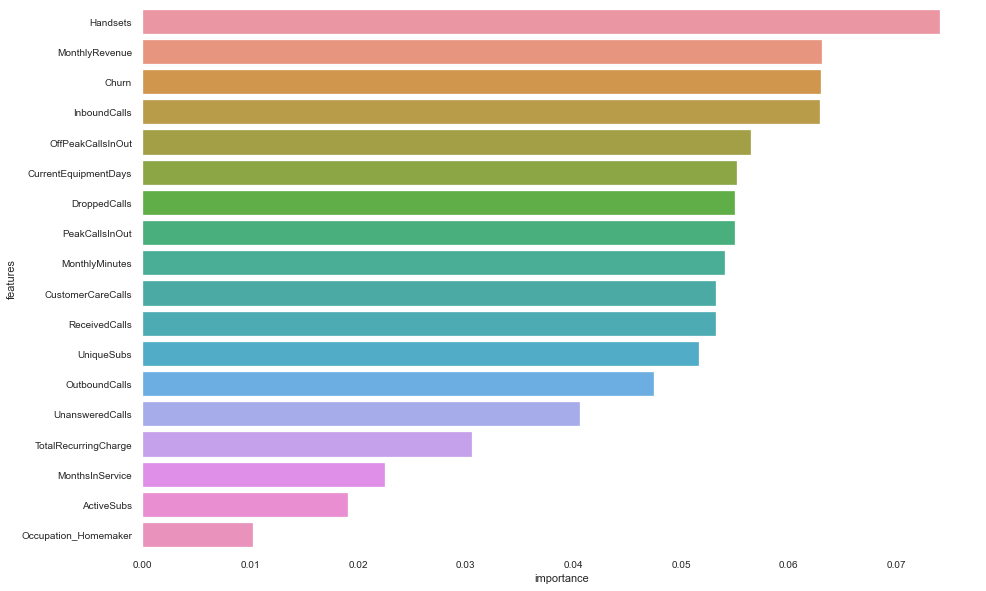

In [32]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Initialize a random forest estimator
forest = ExtraTreesClassifier(n_estimators=50,random_state=0)

# Fit the input matrix and target values to the classifier
forest.fit(X, y)

# Retrieve the computed feature importance
importances = forest.feature_importances_

# Plot the feature importance
plot_data = pd.DataFrame({'features' : pd.Series(X_df.columns),'importance' : pd.Series(importances)})
plt.figure(figsize=(15,10))
plot_data = plot_data.sort_values('importance',ascending=False)
plot_data = plot_data[plot_data['importance'] > 0.01]
ax = sns.barplot(x=plot_data['importance'],y=plot_data['features'],)

# Use the most important features [mif] as X
mifeat_df_X = ohe_churn[plot_data.iloc[:,0].values]
mifeat_df_X = mifeat_df_X.drop(["Churn"], axis = 1)
#mifeat_df_X.columns.tolist()
use = ['CurrentEquipmentDays', 'MonthsInService', 'MonthlyService', 'PercChangeMinutes', 'PercChangeRevenues', 'TotalRecurringCharge', 'UniqueSubs', 'OverageMinutes', 'AgeHH1', 'Regiond', 'MonthlyRevenue', 'MadeCallToRetentionTeamYes', 'MissingPercentMinYes', 'DroppedCalls', 'ReceivedCalls', 'PeakCallsInOut', 'CustomerCareCalls', 'DroppedBlockedCalls', 'OffPeakCallsInOut']
mifeat_df_X = mifeat_df_X[use]

In [33]:
# Split data
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3005)



#  Model Building
## Baseline Model

LogisticRegression(C=0.1, multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.99      0.83     10910
           1       0.46      0.01      0.02      4357

    accuracy                           0.71     15267
   macro avg       0.59      0.50      0.43     15267
weighted avg       0.64      0.71      0.60     15267

Accuracy   Score :  0.7140892120259383
F1 Score: 0.021080959856470058
precision Score: 0.46078431372549017
[[10855    55]
 [ 4310    47]]
Area under curve :  0.50287299618154 



C:\Users\ajayi\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



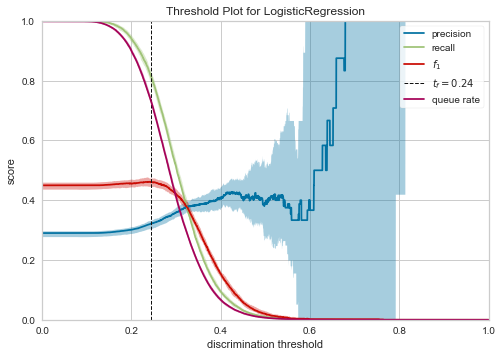

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score, precision_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
import pickle
import joblib


##seperating dependent and independent variables
cols    = [i for i in ohe_churn.drop(["Churn"], axis = 1).columns]


    
def churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot, model_name = "model.sav") :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)  
    #features = list(training_x.columns)
    #print(features)
    joblib.dump(algorithm, "model.pkl")
    #joblib.dump(features, "features.pkl")
    
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    print("F1 Score: {}".format(f1_score(testing_y, predictions)))
    print("precision Score: {}".format(precision_score(testing_y, predictions)))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    print(conf_matrix)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,
                        name = "confusion matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
        
logit  = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

churn_prediction(logit,X_train,X_test,y_train,y_test,
                         cols,"coefficients",threshold_plot = True)



## Synthetic Minority Oversampling TEchnique (SMOTE)
* Randomly pick a point from the minority class.
* Compute the k-nearest neighbors (for some pre-specified k) for this point.
* Add k new points somewhere between the chosen point and each of its neighbors

LogisticRegression(C=0.1, multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.57      0.65     10910
           1       0.35      0.58      0.44      4357

    accuracy                           0.57     15267
   macro avg       0.56      0.57      0.55     15267
weighted avg       0.65      0.57      0.59     15267

Accuracy   Score :  0.5709045654025021
F1 Score: 0.437054223597147
precision Score: 0.3493131868131868
[[6173 4737]
 [1814 2543]]
Area under curve :  0.574734831503694 



C:\Users\ajayi\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



KeyboardInterrupt: 

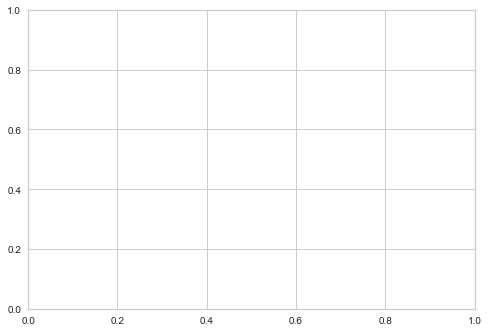

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

smote = SMOTE(random_state=3005, sampling_strategy = 'minority')
X_train_bal, y_train_bal = smote.fit_sample(X_train, y_train)
X_train_bal = pd.DataFrame(X_train_bal, columns = list(X.columns))
y_train_bal = pd.DataFrame(y_train_bal, columns = ["Churn"])
X_rapid = pd.concat([X_train_bal, y_train_bal], axis = 1)
X_rapid.to_csv("rapid.csv")

logit_smote  = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

churn_prediction(logit_smote,X_train_bal,X_test,y_train_bal,y_test,
                         cols,"coefficients",threshold_plot = True)

## <a id='5.3'>5.3. Recursive Feature Elimination</a>
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [36]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(X_train,y_train.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in X_df.drop(["Churn"], axis = 1).columns],
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()


#separating train and test data
train_rf_X = X_train_bal
train_rf_Y = y_train_bal
test_rf_X  = X_test
test_rf_Y  = y_test
print(train_rf_X.shape)

logit_rfe = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
churn_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                         cols,"coefficients",threshold_plot = True)

tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)

KeyboardInterrupt: 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display
from subprocess import call

features = list(X_df.drop(["Churn"], axis = 1).columns)
def plot_decision_tree(train_X, train_Y, test_X, test_Y,columns,maximum_depth,criterion_type,
                       split_type,model_performance = None):
    

    
    #model
    dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(train_X, train_Y)
    
    #plot decision tree
    graph = Source(tree.export_graphviz(dt_classifier,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True, out_file = None                         
                                       )
                  )
    
    graph.render("tree.pdf", view = True)
    
    #model performance
    if model_performance == True :
        churn_prediction(dt_classifier, X_train_bal,test_X,
                                 train_Y,test_Y,
                                 columns,"features",threshold_plot = True)
    display(graph)
    
plot_decision_tree(X_train_bal, y_train_bal, X_test, y_test, features, 5, "gini", "best", model_performance = True)

## <a id='5.8'>5.8. A random forest classifier.</a>
* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement .
* Below are the trees produced by random forest model with 10 estimated trees with maximum depth of three  for each tree. Each tree produced is slightly different from other.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#function attributes
#columns  - column used
#nf_estimators   - The number of trees in the forest.
#estimated_tree  - tree number to be displayed
#maximum_depth   - depth of the tree
#criterion_type  - split criterion type ["gini" or "entropy"]
#Model performance - prints performance of model
features = list(X_df.drop(["Churn"], axis = 1).columns)
def plot_tree_randomforest(train_X, train_Y, test_X, test_Y, columns,nf_estimators,
                           estimated_tree,maximum_depth,
                           criterion_type,model_performance = None) :
    
    
    #train and test datasets
    rf_x     = train_X
    rf_y     = train_Y
    
    #random forest classifier
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(rf_x,rf_y)
    
    #estimated_tree = rfc.estimators_[estimated_tree]
    
   
    #display(graph)
    
    #model performance
    if model_performance == True :
        churn_prediction(rfc,
                                 rf_x,test_X,
                                 rf_y,test_Y,
                                 columns,"features",threshold_plot = True)
        


plot_tree_randomforest(X_train_bal, y_train_bal, X_test, y_test, features,100,99,10,"entropy",True)

In [8]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validatorprint(kf) KFold(n_splits=2, random_state=None, shuffle=False)

print(kf) 

NameError: name 'X' is not defined

## Hyperparameter Tunning For RandomForest

* Remove from markdown to use

In [ ]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {'max_features':['auto'],
                   'max_depth': [None, 1, 10, 20, 30],
                   'min_samples_leaf': [1, 2, 4, 6],
                   'min_samples_split': [2, 5, 10, 15],
                   'n_estimators': [80, 100, 120, 140],
                   'criterion': ['gini', 'entropy']}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, hyperparameters, cv = 10, n_jobs = -1, verbose = 2)
rf_grid.fit(X_train, y_train)

rf_grid.best_params_

## <a id='5.10'>5.10. Support Vector Machine</a>
* “Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.   it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space .where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes 

In [9]:
from sklearn.svm import SVC

#Support vector classifier
#using linear hyper plane
svc_lin  = SVC(C=0.1, cache_size=7000, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

cols = [i for i in mifeat_df_X.columns]
churn_prediction(svc_lin,X_train,X_test,y_train,y_test,
                         cols,"coefficients",threshold_plot = False)

NameError: name 'mifeat_df_X' is not defined

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42))             
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

# Create Final model by 
rf_clf_ = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

rf_clf_.fit(X_train_bal, y_train_bal)

In [ ]:
pred_stack = rf_clf_.predict(X_test)

In [ ]:
print ("\n Classification report : \n",classification_report(y_test, pred_stack))
print ("Accuracy   Score : ",accuracy_score(y_test, pred_stack))
    #confusion matrix
conf_matrix = confusion_matrix(y_test, pred_stack)
print(conf_matrix)
    #roc_auc_score
model_roc_auc = roc_auc_score(y_test, pred_stack) 
print ("Area under curve : ",model_roc_auc,"\n")
#fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])

#  Model Performances
## model performance metrics

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(logit,X_train_bal,X_test,y_train_bal,y_test,
                      "Logistic Regression(Baseline_model)")
model2 = model_report(logit_smote,X_train_bal,X_test,y_train_bal,y_test,
                      "Logistic Regression(SMOTE)")
model3 = model_report(logit_rfe,X_train_bal,X_test,y_train_bal,y_test,
                      "Logistic Regression(RFE)")
decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model4 = model_report(decision_tree,X_train_bal,X_test,y_train_bal,y_test,
                      "Decision Tree")

rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model5 = model_report(rfc,X_train_bal,X_test,y_train_bal,y_test,
                      "Random Forest Classifier")
model6 = model_report(svc_lin,X_train_bal,X_test,y_train_bal,y_test,
                      "SVM Classifier Linear")
#model7 = model_report(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y,
                    #  "SVM Classifier RBF")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

## <a id='6.2'>6.2. Compare model metrics</a>

In [ ]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)



## <a id='6.3'>6.3. Confusion matrices for models</a>

In [ ]:
import itertools
lst    = [logit,logit_smote,decision_tree,rfc,svc_lin]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods):
    if j == None:
        break
    else:
        plt.subplot(4,3, j+1)
        predictions = i.predict(X_test)
        conf_matrix = confusion_matrix(predictions,y_test)
        sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                    xticklabels=["not churn","churn"],
                    yticklabels=["not churn","churn"],
                    linewidths = 2,linecolor = "w",cmap = "Set1")
        plt.title(k,color = "b")
        plt.subplots_adjust(wspace = .3,hspace = .3)

## <a id='6.4'>6.4. ROC - Curves  for models</a>

In [ ]:
lst    = [logit,logit_smote,decision_tree,rfc,svc_lin]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','Random Forest Classifier',
          'SVM Classifier Linear']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

## <a id='6.5'>6.5. Precision recall curves</a>

In [ ]:
### from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve


lst    = [logit,logit_smote,decision_tree,rfc,svc_lin]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','Random Forest Classifier',
          'SVM Classifier Linear']

fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    if j == None:
        break
    else:
        qx = plt.subplot(4,3,j+1)
        probabilities = i.predict_proba(X_test)
        predictions   = i.predict(X_test)
        recall,precision,thresholds = precision_recall_curve(y_test,probabilities[:,1])
        plt.plot(recall,precision,linewidth = 1.5,
                 label = ("avg_pcn : " + 
                          str(np.around(average_precision_score(y_test,predictions),3))))
        plt.plot([0,1],[0,0],linestyle = "dashed")
        plt.fill_between(recall,precision,alpha = .2)
        plt.legend(loc = "lower left",
                   prop = {"size" : 10})
        qx.set_facecolor("k")
        plt.grid(True,alpha = .15)
        plt.title(k,color = "b")
        plt.xlabel("recall",fontsize =7)
        plt.ylabel("precision",fontsize =7)
        plt.xlim([0.25,1])
        plt.yticks(np.arange(0,1,.3))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
# Create adaboost classifer object
from sklearn.model_selection import GridSearchCV

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)
# Train Adaboost Classifer
search.fit(X_train_bal, y_train_bal)

#Predict the response for test dataset
#y_pred = model.predict(X_test)

In [ ]:
y_pred = search.predict(X_test)
#search.best_params_

In [ ]:
print ("\n Classification report : \n",classification_report(y_test, y_pred))
print ("Accuracy   Score : ",accuracy_score(y_test, y_pred))
    #confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
    #roc_auc_score
print("F1 Score: {}".format(f1_score(y_test, y_pred)))
print("precision Score: {}".format(precision_score(y_test, y_pred)))
    
model_roc_auc = roc_auc_score(y_test, y_pred) 
print ("Area under curve : ",model_roc_auc,"\n")
#fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])